[1]   0+0i   0+0i   0+0i   0+0i   0+0i   0+0i   0+0i   0+0i   0+0i -48+0i
[11]   0+0i   0+0i   0+0i   0+0i   0+0i -48+0i   0+0i   0+0i   0+0i   0+0i
[21]   0+0i   0+0i   0+0i   0+0i

Warning message in xy.coords(x, y):
“imaginary parts discarded in coercion”


[1] -4+0i  3+0i  0+0i -3+0i  4+0i -3+0i  0+0i  3+0i -4+0i  3+0i  0+0i -3+0i
[13]  4+0i -3+0i  0+0i  3+0i -4+0i  3+0i  0+0i -3+0i  4+0i -3+0i  0+0i  3+0i

[1] TRUE

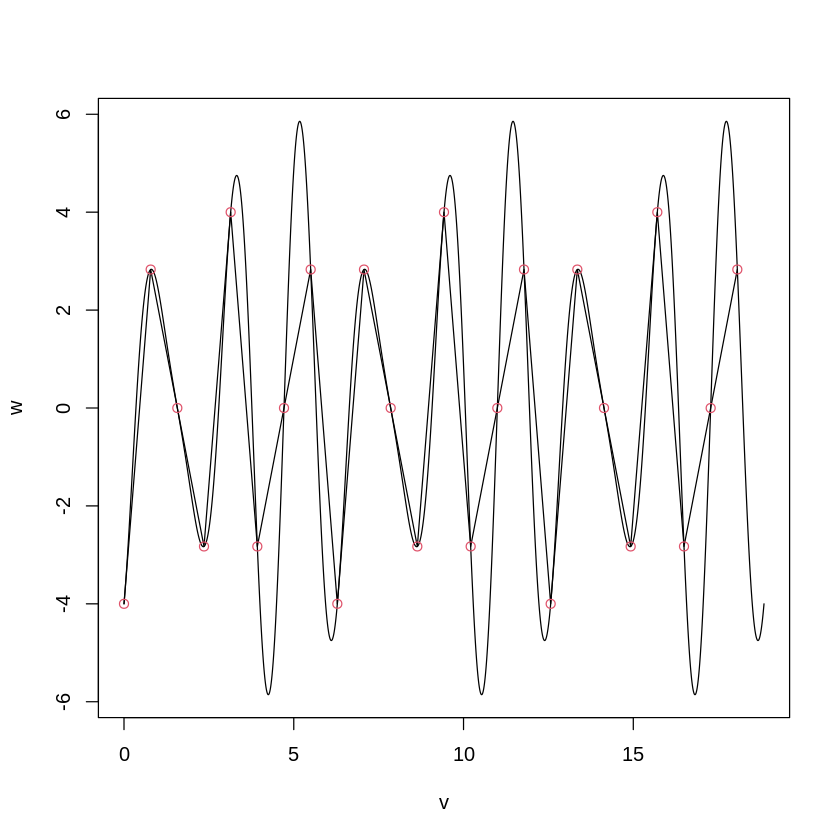

In [ ]:
fft <- function(z, inverse=FALSE) {
  n <- length(z)
  if(n == 0) return(z)
  k <- 0:(n-1)
  ff <- (if(inverse) 1 else -1) * 2*pi * 1i * k/n
  vapply(1:n, function(h) sum(z * exp(ff*(h-1))), complex(1))
}

# Number of sampled points:
N <- 24

# Normalized time vector from 0 to 1: Fourier time
joetm <- seq(0,(N-1)/N,1/N)

# This is to make the plot of the actual signal:
v <- seq(0,6*pi,0.0001)

# The actual signal:
f <- function(z){
          2*sin(4*z) - 4*cos(3*z)
}

# Sampled points:
sam <- f(joetm*max(v))
# Points to make a pretty graph of the actual signal:
w <- f(v)

# No scientific notation:
options(scipen = 999)

# Discrete Fourier transform:
dft <- fft(sam)
round(dft)

# Inverse Fourier transform:
inv <- fft(dft, inverse = TRUE)/length(joetm)

# Actual plot of the signal;
plot(v,w,type='l')
# Reconstructed points:
points(joetm*max(v),inv, type='l')
# Sampled points superimposed on the reconstructed points:
points(joetm*max(v),sam,col=2)

# Empty matrix to collect dot products of DFT coeff's times
# whatever is needed to invert the DFT
# using cosines and sines (trigonometric expression):

mtx <- matrix(rep(0,N^2),N,N)

for (m in 1:N){ # To every reconstructed time point m
                # all freq's will contribute including 0.
  for (k in 1:N){ # This is the sum of each freq contribution:
    # Each point in each row:
    mtx[m,k] <- 1/N * sum(dft[k]
                        * exp(1i*2*pi*(m-1)*(k-1)/N))
  }
}

# Trigonometric form does not work for unexplained reasons (numerical?)
# tri <- matrix(rep(0,N^2),N,N)
#for (m in 1:N){
#   for (k in 1:N){ # This is the sum of each freq contribution:
      # Each point in each row:
#     mtx[m,k] <- 1/N * sum(
#                           (Mod(dft[k])*exp(1i*Arg(dft[k]))) *
#                           exp(1i*2*pi*(m-1)*(k-1)/N))
#    }
#}

round(inv)
all.equal(round(rowSums(mtx)), round(inv))